# Titanic Survival Analysis 
## Goal  
Identify factors influencing passenger survival using Python.  
## Key Steps  
1. Handled missing data in `Age` (median imputation by class/gender).  
2. Engineered features (`Family_Size`, `Title`).  
3. Found: **Women in 1st class had 97% survival rate**.  
## Tools Used  
- Python (Pandas, Seaborn).  
- Jupyter Notebook.   

In [74]:
import pandas as pd

#import the raw dataset to be cleaned
df = pd.read_csv('train.csv')

In [76]:
#display sample rows from top and bottom
print(df.head())
print('\n')
print(df.tail())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  




In [78]:
# check data types of the columns i.e numeric or categorical
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [80]:
# display some statistical values for analysis
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [82]:
# identify missing data
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [86]:
# Impute missing 'Age' values with median grouped by Pclass & Sex to account for:
# - Wealthier classes (Pclass=1) likely being older
# - Gender-based age differences
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [88]:
# displaying the results after handling missing values in ['Age']
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [90]:
# fill missing values in column Cabin by creatig a new Binary "Has_Cabin" for ['Cabin'] 
df['Has_Cabin'] = df['Cabin'].notnull().astype(int)
df.drop('Cabin', axis=1, inplace=True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Has_Cabin      0
dtype: int64


In [92]:
# fill missing values in column ['Embarked'] with the help of mode(), most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64


<Axes: xlabel='Fare'>

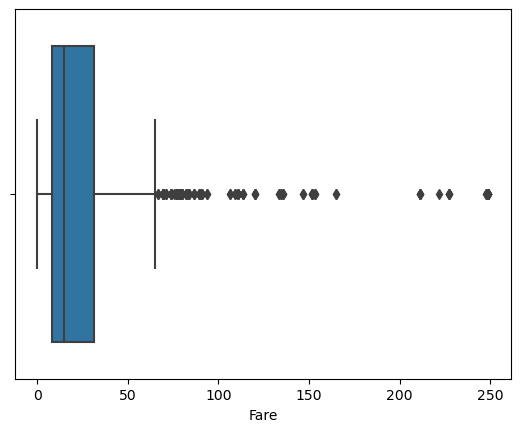

In [126]:
# Detection of Outliers in ['Fare'] with the help of Box Plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Fare'])

In [96]:
# Cap 'Fare' at the 99th percentile to mitigate extreme outliers (e.g., rare luxury tickets)
# Note: This preserves data integrity while reducing skewness for statistical analysis
fare_upper_limit = df['Fare'].quantile(0.99)
df['Fare'] = df['Fare'].clip(upper=fare_upper_limit)

In [98]:
# Feature Engineering:
# 1. 'Family_Size': Combines SibSp + Parch + 1 (passenger themselves) to analyze family impact on survival
# 2. 'Title': Extracts honorifics (Mr, Mrs, etc.) from 'Name' to infer social status/age groups
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [100]:
# categorical data encoding
# Label encode 'Sex' (binary: male=1, female=0) for simplicity in logistic regression models
# Alternative: One-hot encoding if gender-neutral analysis is preferred
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
# for ['Embarked'], use one-hot encoding
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

In [102]:
# Key Insight: Survival rate by class & gender
df.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex
1       0      0.968085
        1      0.368852
2       0      0.921053
        1      0.157407
3       0      0.500000
        1      0.135447
Name: Survived, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

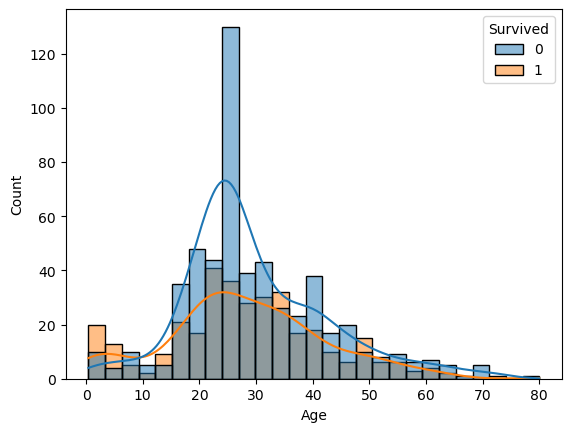

In [104]:
# check age ditribution of survivors and non-survivors using histpot
sns.histplot(data=df, x='Age', hue='Survived', kde=True)

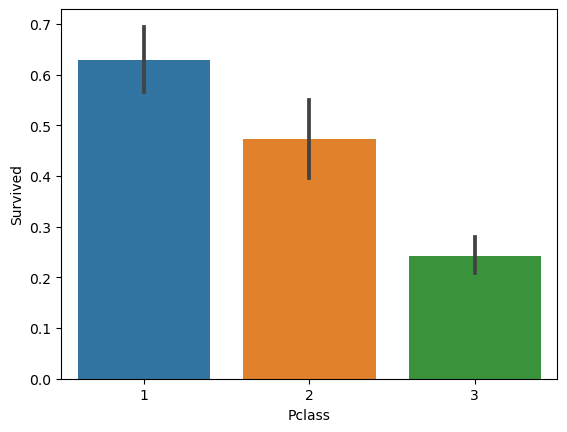

In [136]:
# Data Visualization
# survival rate by Passenger Class ['Pclass']
sns.barplot(x='Pclass', y='Survived', data=df)
plt.savefig('plots/survival_by_passenger_class.png')

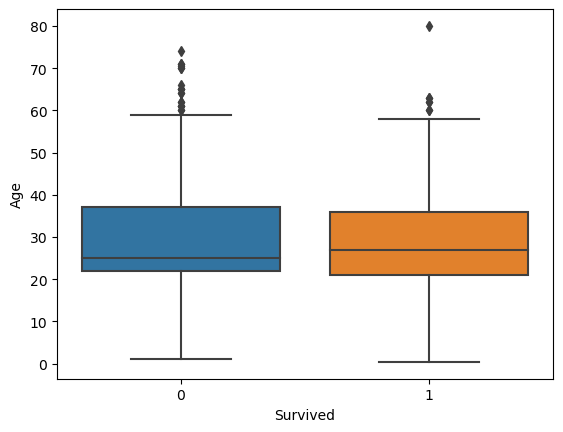

In [132]:
# age distribution by survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.savefig('plots/age_ditribution_by_survival.png')

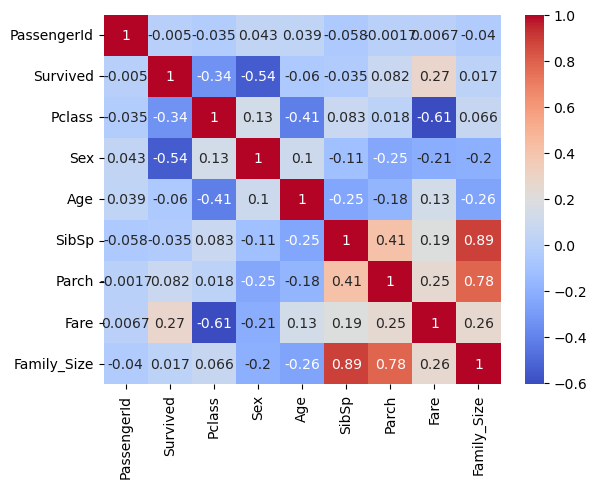

In [134]:
# keep numerical coumns only to plot correlation heatmap
numerical_df = df.select_dtypes(include=['int64', 'float64'])
# plot correlation heatmap
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.savefig('plots/correlation_heatmap.png')

In [138]:
# finally save cleaned data to a new .csv file
df.to_csv('titanic_cleaned.csv', index=False)